# Bike Share Case Study

- This cap stone project is conducted as a part of the Google Analytics Professional Certificate.
- The project follows the following 5 steps to keep the analytics project organised and efficient: <br>
  Ask, Prepare, Process, Analyze, Share 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## 1.) Ask
 #### <i> Understand the Business Problem </i>

- Cyclistic is a bikeshare company, they operate in Chicago and have more than 5,000 bikes across 692 stations. 
- Cyclistic has two types of customers, casual riders and annual membership riders.
- Annual membership riders are more profitable for cyclistic compared to casual riders. Company wants to come up with a marketing strategy to convert casual riders to annual membership riders.
- To achieve the above goal we need to analyze how the casual riders and annual membership riders differ from each other so that the marketing team can devise an efficient marketing campaign.

#### Goal: 
- Analyze how the Cyclistic subscription type riders differ from customer type (casual) riders.
- Discover insights that will help in creating a marketing campaign targeted at customer type riders. 

## 2.) Prepare

#### <i> Locate the data, identify the metrics that need to be calculated, create measures to protect the data </i>

### 2.1) Import the Data

- Data is available seperately for each quarter.
- Data Source: vy-tripdata.s3.amazonaws.com/index.html
- Load the data from local device, after downloading from the above link.

In [2]:
# Import the 2018 trip data fom csv files
Q1_2018 = pd.read_csv("D:\AI\Data_Analytics\Google_Analytics_Coursera\Bike_Share_Case_Study\Bike_Share_Data_2018-2020\Divvy_Trips_2018_Q1.csv")
Q2_2018 = pd.read_csv("D:\AI\Data_Analytics\Google_Analytics_Coursera\Bike_Share_Case_Study\Bike_Share_Data_2018-2020\Divvy_Trips_2018_Q2.csv")
Q3_2018 = pd.read_csv("D:\AI\Data_Analytics\Google_Analytics_Coursera\Bike_Share_Case_Study\Bike_Share_Data_2018-2020\Divvy_Trips_2018_Q3.csv")
Q4_2018 = pd.read_csv("D:\AI\Data_Analytics\Google_Analytics_Coursera\Bike_Share_Case_Study\Bike_Share_Data_2018-2020\Divvy_Trips_2018_Q4.csv")

### 2.2) Glimpse of the Data set

In [3]:
# view the first five records from first quarter
Q1_2018.head(5)

,01 - Rental Details Rental ID,01 - Rental Details Local Start Time,01 - Rental Details Local End Time,01 - Rental Details Bike ID,01 - Rental Details Duration In Seconds Uncapped,03 - Rental Start Station ID,03 - Rental Start Station Name,02 - Rental End Station ID,02 - Rental End Station Name,User Type,Member Gender,05 - Member Details Member Birthday Year
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:23,3304,323.0,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0
1,17536703,2018-01-01 00:41:35,2018-01-01 00:47:52,5367,377.0,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0
2,17536704,2018-01-01 00:44:46,2018-01-01 01:33:10,4599,"2,904.0",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0
3,17536705,2018-01-01 00:53:10,2018-01-01 01:05:37,2302,747.0,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0
4,17536706,2018-01-01 00:53:37,2018-01-01 00:56:40,3696,183.0,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0


In [4]:
# check data types
print(Q1_2018.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387145 entries, 0 to 387144
Data columns (total 12 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   01 - Rental Details Rental ID                     387145 non-null  int64  
 1   01 - Rental Details Local Start Time              387145 non-null  object 
 2   01 - Rental Details Local End Time                387145 non-null  object 
 3   01 - Rental Details Bike ID                       387145 non-null  int64  
 4   01 - Rental Details Duration In Seconds Uncapped  387145 non-null  object 
 5   03 - Rental Start Station ID                      387145 non-null  int64  
 6   03 - Rental Start Station Name                    387145 non-null  object 
 7   02 - Rental End Station ID                        387145 non-null  int64  
 8   02 - Rental End Station Name                      387145 non-null  object 
 9   User

### 2.3) Change column Names

In [5]:
# check if the column names are matching for different tables
Q1_2018.columns == Q2_2018.columns

array([False, False, False, False, False, False, False, False, False,
       False, False, False])

In [6]:
# Create dict to replace column names
column_names_dict = dict(zip(Q1_2018.columns,Q2_2018.columns))

In [7]:
# Rename the Q1 column names according to the rest of tables
Q1_2018.rename(columns = column_names_dict, inplace= True)

### 2.4) Concatanate the quarters

In [8]:
# concatanate all four quarters to get the whole data of 2018 in one dataframe
trips_2018 = pd.concat([Q1_2018, Q2_2018, Q3_2018, Q4_2018], axis = 0, ignore_index = True)

In [9]:
print("shape of the trips_2018 dataset: ",trips_2018.shape)

shape of the trips_2018 dataset:  (3603082, 12)


### 2.5) Factors to Analyze:

Some metrics that we can use to differentitate the casual riders from the subscription riders:
<i>
- Time of the day
- Duration of the trips
- Stations
- Routes
- Age of the Customers
- Gender of the customers
- Bike ID
    </i>

## 3.) Process

### 3.1) Check for Null Values

In [10]:
# Check for null values
trips_2018.isnull().any()

trip_id              False
start_time           False
end_time             False
bikeid               False
tripduration         False
from_station_id      False
from_station_name    False
to_station_id        False
to_station_name      False
usertype             False
gender                True
birthyear             True
dtype: bool

<b> Observations: </b>
- There are null values in 'gender' and 'birthyear' column.

In [11]:
# Count the number of null values
print("Number of null values in gender column: ",trips_2018['gender'].isnull().sum())
print("Number of null values in birthyear column: ",trips_2018['birthyear'].isnull().sum())

Number of null values in gender column:  562505
Number of null values in birthyear column:  555209


#### Remove the Rows with Null Values

In [12]:
# Remove the null values
# Since we have sufficient data we can remove the rows entirely
# Analyzing the rides with null in birthyear and gender would be easier.
trips_2018.dropna(inplace = True)

In [13]:
print("shape of the dataset after removing null values: ",trips_2018.shape)

shape of the dataset after removing null values:  (3040517, 12)


### 3.2) Check for Duplicates

In [14]:
# Check for duplicate entries
print("number of duplicate records: ", trips_2018.duplicated().sum())

number of duplicate records:  0


### 3.3) Check for structural errors in Data
Categories, minimum and maximum values

In [15]:
# categories in gender
print("Categories in gender column: ",trips_2018['gender'].unique())

Categories in gender column:  ['Male' 'Female']


In [16]:
# categories in usertype
print("Categories in usertype column: ",trips_2018['usertype'].unique())

Categories in usertype column:  ['Subscriber' 'Customer']


- Note: Since casual riders are mentioned simply as Customers in the data set we will also follow the same terminology from now on.

In [17]:
# minimum and maximum birthyear
# change birthyear dtype to int
trips_2018['birthyear'] = trips_2018['birthyear'].astype(int)
print("Birthyear of youngest rider: ",trips_2018['birthyear'].max())
print("Birthyear of oldest rider: ",trips_2018['birthyear'].min())

Birthyear of youngest rider:  2005
Birthyear of oldest rider:  1895


<b> Observations: </b>
- The Minimum birth year is too small, in 2019 a person born in 1895 would be 124 years old.
- It doesn't make sense that a 124 year old person is riding bike.
- Since there are not too many people who live for more than 100 years, it's more probable that birthyear has been entered wrong. 

### 3.4) Clean Age

In [18]:
# Count people older than 100 years
print("Number of people who are older than 100 years: ",trips_2018[trips_2018['birthyear'] < 1919]['birthyear'].count())

Number of people who are older than 100 years:  817


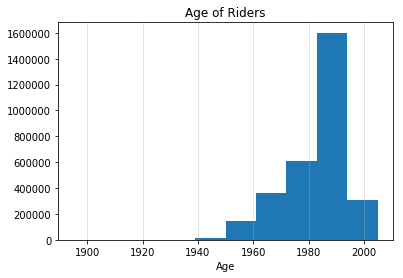

In [19]:
# Visualise the distribution of birthyears
# Histogram of ages
plt.hist(trips_2018['birthyear'])
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.title("Age of Riders")
plt.xlabel("Age")
plt.show()

<b> Observation: </b>
- Majority of birthyears are concentrated between 1960 and 2000.

In [20]:
# Drop the rows where DOB is less than 1919; riders older than 100
trips_2018 = trips_2018[trips_2018.birthyear > 1919]

### 3.5) Clean the Time columns
 check dtypes, min-max values, distribution of dates for start_time and end_time

In [21]:
# Check data types of time columns
print("data types of start_time column: ",type(trips_2018['start_time'][0]))

data types of start_time column:  <class 'str'>


In [22]:
# Check minimum date time for start_time column
print("Minimum time in start_time column: ",pd.to_datetime(trips_2018['start_time']).min())
print("Maximum time in start_time column: ",pd.to_datetime(trips_2018['start_time']).max())

Minimum time in start_time column:  2018-01-01 00:12:00
Maximum time in start_time column:  2018-12-31 23:59:18


In [23]:
# Check minimum date time for end_time column
print("Minimum time in end_time column: ",pd.to_datetime(trips_2018['end_time']).min())
print("Maximum time in end_time column: ",pd.to_datetime(trips_2018['end_time']).max())

Minimum time in end_time column:  2018-01-01 00:17:23
Maximum time in end_time column:  2019-01-06 14:40:28


<b> Observations: </b>
- Maximum end_time is in 2019; probably some rides are ending after midnight on 1st Jan 2019.

In [24]:
# Convert start_time and end_time columns to datetime data type
trips_2018['end_time'] = pd.to_datetime(trips_2018['end_time'])
trips_2018['start_time'] = pd.to_datetime(trips_2018['start_time'])

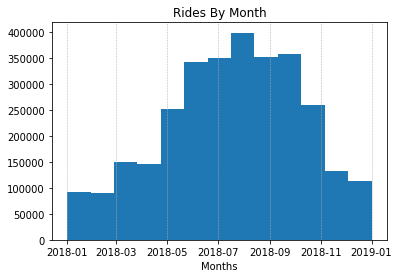

In [25]:
# Plot distribution of start_time dates
plt.hist(trips_2018['start_time'], bins=13)
plt.title("Rides By Month")
plt.xlabel('Months')
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.show()

<b> Observation: </b>
- Number of rides is higher in the mid months from June to October, and number of rides reaches peak value in August.

### 3.6) Clean the Tripduration column

#### 3.6.1) Min, Max, Dtype of Tripduration

In [26]:
# Taking a look at tripduration values
trips_2018['tripduration'][:3]

0      323.0
1      377.0
2    2,904.0
Name: tripduration, dtype: object

<b> Observation </b>
- Tripduration values are in seconds; the dtype is object and comma seperators also present.

In [27]:
# Remove the commas from tripduration column
trips_2018['tripduration'] = trips_2018['tripduration'].str.replace(',','')

In [28]:
# Convert to float data type 
trips_2018['tripduration'] = trips_2018['tripduration'].astype(float)

In [29]:
# change the float display format to enable comma seperator at 1000s
pd.options.display.float_format = '{:,}'.format

In [30]:
# Minimum and Maximum trip durations
print("Minimum Trip Duration  in Hours: ",(trips_2018['tripduration'].min())/(60*60))
print("Maximum Trip Duration in Hours: ",(trips_2018['tripduration'].max())/(60*60))

Minimum Trip Duration  in Hours:  0.016944444444444446
Maximum Trip Duration in Hours:  3766.0


<b>Observations:</b>
- The shortest ride is just one minute and the longest ride is 156 days

#### 3.6.2) Check exteme Outliers in Tripduration

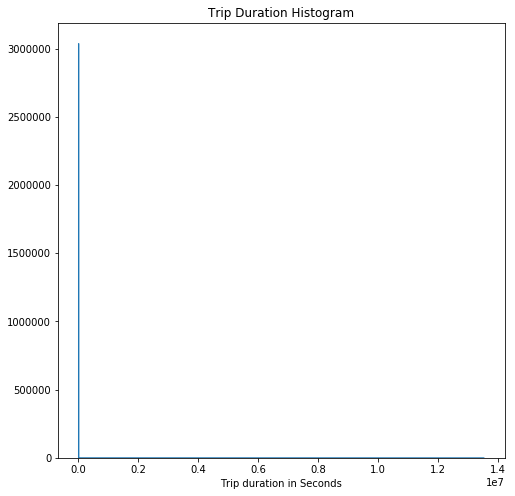

In [31]:
# plot the trip duration histogram 
# Check the distrubution of tripduration
plt.figure(figsize=(8,8)) 
plt.hist(trips_2018['tripduration'], bins = 1000, histtype='step') 
plt.title('Trip Duration Histogram')
plt.xlabel('Trip duration in Seconds')
plt.show()

<b> Observation </b>
- The trip duration values are concentrated on the far left.

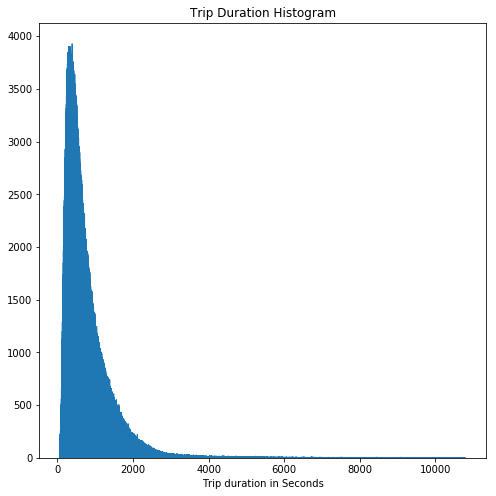

In [32]:
# Histogram of tripduration when the trip duration is less than three hours
plt.figure(figsize=(8,8))
plt.hist(trips_2018[trips_2018['tripduration'] < 10800]['tripduration'], bins = 100000, histtype='step')  
plt.title('Trip Duration Histogram')
plt.xlabel('Trip duration in Seconds')
plt.show()

<b> Observations: </b>
- Majority of the data points have trip duration less than 4000 seconds.

#### Use percentiles to visualise the extreme outliers

percentile values:  [2.40000e+02 3.22000e+02 4.03000e+02 4.90000e+02 5.90000e+02 7.12000e+02
 8.75000e+02 1.11300e+03 1.52400e+03 1.35576e+07]


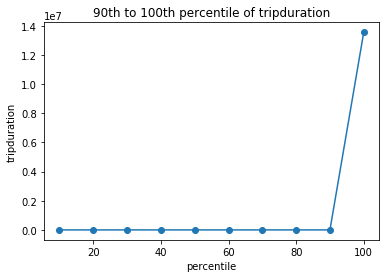

In [33]:
# Find out the trip duration percentiles
# Visualise the percentiles
percentile = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
percentile_values = np.percentile(trips_2018['tripduration'],percentile)
print("percentile values: ",percentile_values)
plt.scatter(percentile, percentile_values)
plt.plot(percentile, percentile_values)
plt.title('90th to 100th percentile of tripduration')
plt.xlabel('percentile')
plt.ylabel('tripduration')
plt.show()

percentile values:  [1.52400e+03 1.58600e+03 1.65600e+03 1.73500e+03 1.83200e+03 1.94900e+03
 2.10200e+03 2.31300e+03 2.67700e+03 3.85700e+03 1.35576e+07]


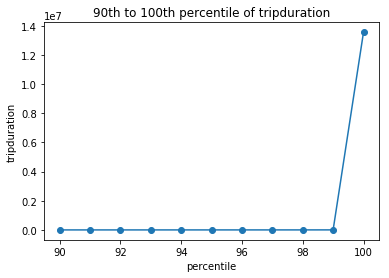

In [34]:
# Find out the trip duration percentiles
# Visualise the percentiles
percentile = [90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
percentile_values = np.percentile(trips_2018['tripduration'],percentile)
print("percentile values: ",percentile_values)
plt.scatter(percentile, percentile_values)
plt.plot(percentile, percentile_values)
plt.title('90th to 100th percentile of tripduration')
plt.xlabel('percentile')
plt.ylabel('tripduration')
plt.show()

percentile values:  [3.8570000e+03 4.1200000e+03 4.4194080e+03 4.7750000e+03 5.1910000e+03
 5.7195050e+03 6.4800000e+03 7.4899030e+03 9.0580000e+03 1.4694903e+04
 1.3557600e+07]


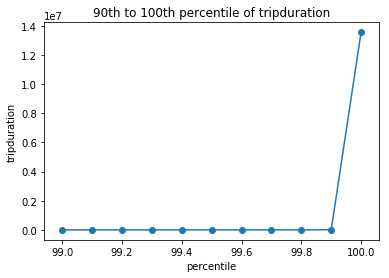

In [35]:
# Find out the trip duration percentiles
# Visualise the percentiles
percentile = [99.0, 99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9, 100]
percentile_values = np.percentile(trips_2018['tripduration'],percentile)
print("percentile values: ",percentile_values)
plt.scatter(percentile, percentile_values)
plt.plot(percentile, percentile_values)
plt.title('90th to 100th percentile of tripduration')
plt.xlabel('percentile')
plt.ylabel('tripduration')
plt.show()

In [36]:
# Check the count of extreme outliers (where trip duration is higher than 99.9 percentile)
print("Number of extreme outliers in tripduration: ",trips_2018[trips_2018['tripduration'] > 14694]['tripduration'].count())

Number of extreme outliers in tripduration:  3040


<b> Observations: </b>
- Extreme outliers are present beyond the 99.9th percentile
- There are 3040 extreme outliers
- Since these outliers are not erroneous points and can contain meaningfull insights we should analyze them seperately.

#### 3.6.3) Remove the outliers

In [37]:
trips_2018 = trips_2018[trips_2018['tripduration'] < 14694]

### 3.7) Clean the start_station and end_station

#### 3.7.1)

In [38]:
# Check Counts of Unique stations
print("Count of unique from_station_name: ",trips_2018['from_station_name'].nunique())
print("Count of unique from_station_id: ",trips_2018['from_station_id'].nunique())
print('---'*15)
print("Count of unique to_station_name: ",trips_2018['to_station_name'].nunique())
print("Count of unique to_station_id: ",trips_2018['to_station_id'].nunique())

Count of unique from_station_name:  620
Count of unique from_station_id:  619
---------------------------------------------
Count of unique to_station_name:  619
Count of unique to_station_id:  618


<b> Observations: </b>
- There is a discrepancy in the station_id counts and station_name counts
- One station name is getting repeated for two different station id

#### 3.7.2) Get the repeating station_id

In [39]:
# Group By station_Id and Station_name
y = trips_2018.groupby(['to_station_id','to_station_name']).size().index

# Get the list of station_id corresponding to each station name
x= []
for i in range(619):
    x.append(y[i][0])

# Get the station_id that is repeating 
uniqueList = []
duplicateList = []
 
for i in x:
    if i not in uniqueList:
        uniqueList.append(i)
    elif i not in duplicateList:
        duplicateList.append(i)
 
print("Repeating station_id: ",duplicateList)

Repeating station_id:  [243]


In [40]:
# Check station names for station_id 243
print("Station names corresponding to station_id 243: ",trips_2018.loc[trips_2018.to_station_id == 243,'to_station_name'].unique())

Station names corresponding to station_id 243:  ['Lincoln Ave & Leavitt St' 'Lincoln Ave & Sunnyside Ave']


In [41]:
# Change the station ID for one of the station name
trips_2018.loc[trips_2018.to_station_name == 'Lincoln Ave & Leavitt St', 'to_station_id'] = 665
trips_2018.loc[trips_2018.from_station_name == 'Lincoln Ave & Leavitt St', 'from_station_id'] = 665

## 4.) Analyze

### 4.1) Difference in Quantity
Counts of subscription type rides and customer type rides

In [42]:
# Total rides
print('total number of rides in 2018: ', trips_2018.shape[0])
print('total number of rides by subscription type users in 2018: ', trips_2018[trips_2018['usertype'] == 'Subscriber'].shape[0])
print('total number of rides by customer type users in 2018: ', trips_2018[trips_2018['usertype'] == 'Customer'].shape[0])

total number of rides in 2018:  3036659
total number of rides by subscription type users in 2018:  2913716
total number of rides by customer type users in 2018:  122943


<b> Observations: </b> 
- Approx 96% rides are by Subscription type users 
- Approx 4% rides are by Customer type users 
- We don't have the count of users. We don't know the number of subscription type riders are there. We only know the number of rides.

### 4.2) Analyze Tripduration

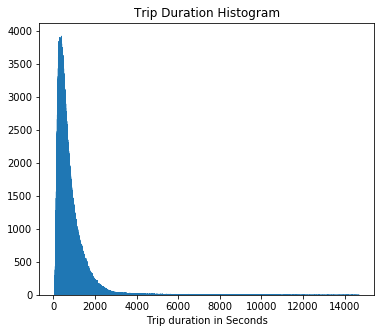

In [43]:
# Distribution of trip duration

plt.figure(figsize=(6,5))
plt.hist(trips_2018['tripduration'], bins = 100000, histtype='step')
plt.title('Trip Duration Histogram')
plt.xlabel('Trip duration in Seconds')
plt.show()

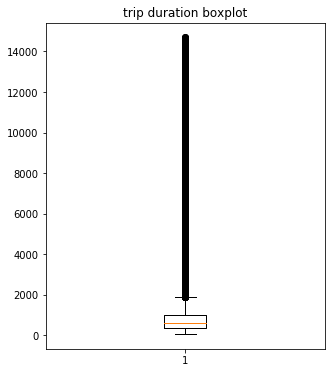

In [44]:
# Boxplot of trip duration
plt.figure(figsize=(5,6))
plt.boxplot(trips_2018['tripduration'])
plt.title('trip duration boxplot')
plt.show()

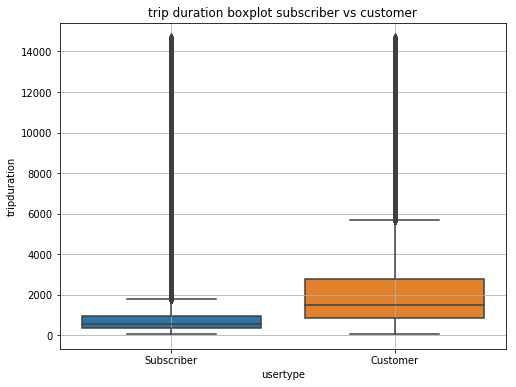

In [45]:
# Compare tripduration boxplots of subsriber type rides and customer type rides
plt.figure(figsize=(8,6))
sns.boxplot(x = trips_2018['usertype'], y = trips_2018['tripduration'])
plt.title('trip duration boxplot subscriber vs customer')
plt.grid()
plt.show()

In [46]:
# Get a statistical overview of tripduration for Subscribers and Customers
tripduration_stats = pd.DataFrame\
({
'subscriber_type_rides': trips_2018.loc[trips_2018.usertype == 'Subscriber','tripduration'].describe().round(1),\
'customer_type_rides': trips_2018.loc[trips_2018.usertype == 'Customer','tripduration'].describe().round(1)
})
print("statistical overview of tripduration for Subscribers and Customers: ")
tripduration_stats

statistical overview of tripduration for Subscribers and Customers: 


,subscriber_type_rides,customer_type_rides
count,"2,913,716.0","122,943.0"
mean,733.3,"2,206.5"
std,596.5,"2,055.9"
min,61.0,61.0
25%,355.0,863.0
50%,573.0,"1,504.0"
75%,936.0,"2,794.0"
max,"14,692.0","14,692.0"


### Observations:  
- Subscibers type riders generally use the bike for shorter durations while customer type riders use bike for longer duration.
- Average trip duration of customer type rides is 2206 seconds which is almost three times that of subscriber type tripduration.
- There is decent overlap in the customer trip duration and subscriber trip duration, meaning there are enough number of customers who have same tripduration as subscribers.


### 4.3) Age of Customers

<Figure size 504x360 with 0 Axes>

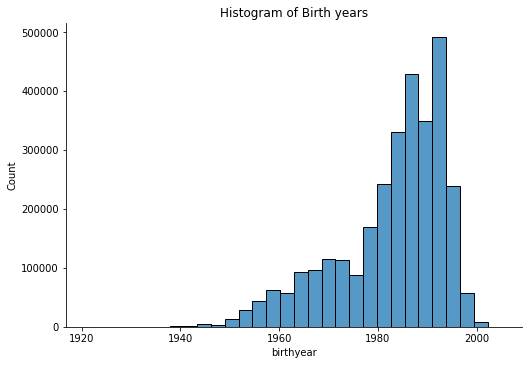

In [47]:
# Create a histogram to understand the distribution of birthyears
plt.figure(figsize=(7,5))
sns.displot(data = trips_2018, x = 'birthyear', bins =30, height = 5, aspect = 1.5)
plt.title('Histogram of Birth years')
plt.show()

C:\Users\Sandeep Gurjar\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


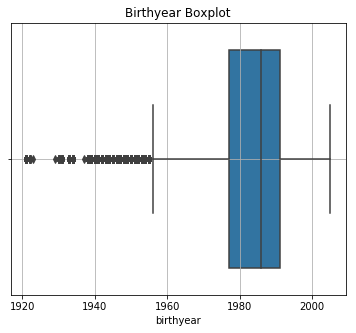

In [48]:
# Create a boxplot to visualise the birthyear quantiles and central tendency
plt.figure(figsize=(6,5))
sns.boxplot(trips_2018['birthyear'])
plt.title('Birthyear Boxplot')
plt.grid()
plt.show()

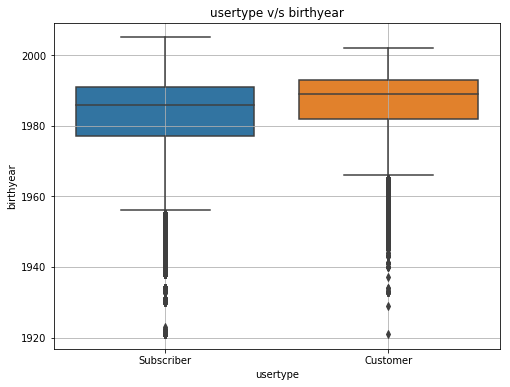

In [49]:
# Boxplots for birthyear; Subscriber v/s customer
plt.figure(figsize=(8,6))
sns.boxplot(x = trips_2018['usertype'], y = trips_2018['birthyear'])
plt.title('usertype v/s birthyear')
plt.grid()
plt.show()

In [50]:
# Get a statistical overview of birthyear for Subscribers and Customers
birthyear_stats = pd.DataFrame\
({
'subscriber_type_rides': trips_2018.loc[trips_2018.usertype == 'Subscriber','birthyear'].describe().round(1),\
'customer_type_rides': trips_2018.loc[trips_2018.usertype == 'Customer','birthyear'].describe().round(1)
})
print("statistical overview of birthyear for Subscribers and Customers: ")
birthyear_stats

statistical overview of birthyear for Subscribers and Customers: 


,subscriber_type_rides,customer_type_rides
count,"2,913,716.0","122,943.0"
mean,"1,982.6","1,986.4"
std,10.9,9.8
min,"1,921.0","1,921.0"
25%,"1,977.0","1,982.0"
50%,"1,986.0","1,989.0"
75%,"1,991.0","1,993.0"
max,"2,005.0","2,002.0"


<b> Observations: </b>
- Comparatively the younger users are less subscription types. 
- However the age is not a defining factor for choice between Subscriber type and Customer type

### 4.4) Gender of the users

In [51]:
# Count the number rides by of Male and Female users
print('total number of rides in 2018: ', trips_2018.shape[0])
print('total number of rides by gender in 2018: ')
A1 = trips_2018['gender'].value_counts()
A1

total number of rides in 2018:  3036659
total number of rides by gender in 2018: 


Male      2278944
Female     757715
Name: gender, dtype: int64

In [52]:
# Count of Subscriber type rides by Male and Female users
A = trips_2018[trips_2018['usertype'] == 'Subscriber']['gender'].value_counts()
A

Male      2204657
Female     709059
Name: gender, dtype: int64

In [53]:
# Count of Customer type rides by Male and Female users
B = trips_2018[trips_2018['usertype'] == 'Customer']['gender'].value_counts()
B

Male      74287
Female    48656
Name: gender, dtype: int64

In [54]:
# Percentage of rides
print("Percentage of rides by Subscriber type females users: ",  round((A[1]/A1[1])*100,1))
print("Percentage of rides by Customer type females users: ",  round((B[1]/A1[1])*100,1))

Percentage of rides by Subscriber type females users:  93.6
Percentage of rides by Customer type females users:  6.4


In [55]:
print("Percentage of rides by Subscriber type male users: ",  round((A[0]/A1[0])*100,1))
print("Percentage of rides by Customer type male users: ",  round((B[0]/A1[0])*100,1))

Percentage of rides by Subscriber type male users:  96.7
Percentage of rides by Customer type male users:  3.3


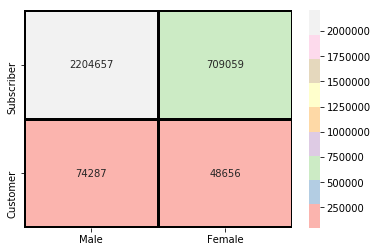

In [56]:
# Create a Data Frame for Heatmap
gender_usertype_df = pd.DataFrame({'Male':[2204657, 74287], 'Female':[709059, 48656]}, index = ['Subscriber','Customer'])

# Visualise the DF with Heatmap
sns.heatmap(gender_usertype_df, annot = True, fmt = 'd', linewidth = 2, linecolor = 'black', cmap = 'Pastel1')
plt.show()

<b> Observations </b>
- Percentage of Subscriber type rides by males is Higher compared to  Females
- Customer type females rides have higher percentage compared to customer type male rides, but the total number of Males customer type rides is higher  

 ### 4.5) Time of the day

### start_time

<Figure size 504x360 with 0 Axes>

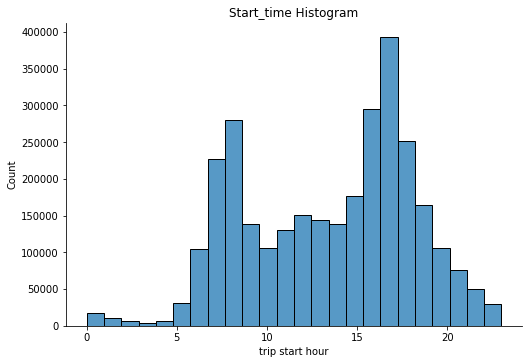

In [57]:
# Check the distribution of start_time
plt.figure(figsize=(7,5))
sns.displot(trips_2018['start_time'].dt.hour, aspect = 1.5, bins =24)
plt.title("Start_time Histogram")
plt.xlabel("trip start hour")
plt.show()

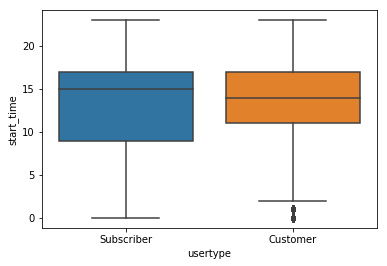

In [73]:
# compare the start_time boxplots of Subsriber and Customer type rides
sns.boxplot(x = trips_2018['usertype'], y = trips_2018['start_time'].dt.hour)
plt.show()

In [69]:
# Get the values of quantiles
Start_time_Subs = trips_2018[trips_2018['usertype']=='Subscriber']['start_time'].dt.hour.quantile([0.25,0.50,0.75])
Start_time_Cust = trips_2018[trips_2018['usertype']=='Customer']['start_time'].dt.hour.quantile([0.25,0.50,0.75])
print('Percentile values for start_time when rides are Subscription type: ')
print(Start_time_Subs)
print('---'*20)
print('Percentile values for start_time when rides are Customer type: ')
print(Start_time_Cust)

Percentile values for start_time when rides are Subscription type: 
0.25    9.0
0.5    15.0
0.75   17.0
Name: start_time, dtype: float64
------------------------------------------------------------
Percentile values for start_time when rides are Customer type: 
0.25   11.0
0.5    14.0
0.75   17.0
Name: start_time, dtype: float64


<b> Observation: </b>
- Subscribers type riders are using bikes comparatively more in the morning compared to the Customer type rides.
- 25th percentile for Subscribers is near 9 AM and for Customer type riders it is near 11 AM.

### endtime

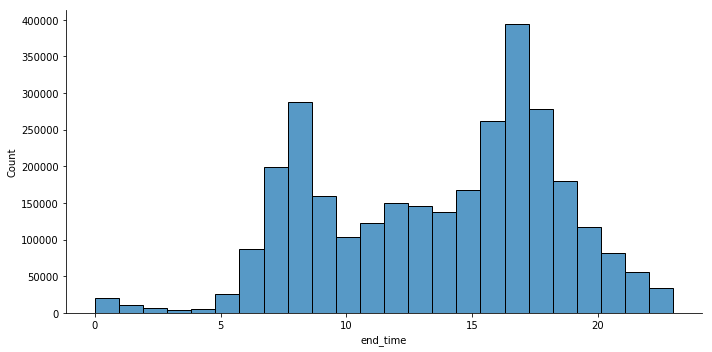

In [58]:
# Check the distribution of end_time
sns.displot(trips_2018['end_time'].dt.hour, bins =24, aspect = 2)
plt.show()

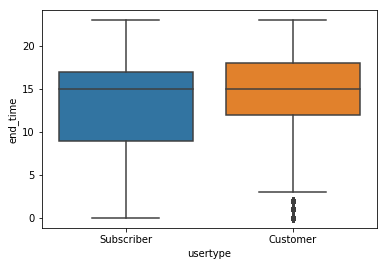

In [59]:
# compare the end_time boxplots of Subsriber and Customer type rides
sns.boxplot(x = trips_2018['usertype'], y = trips_2018['end_time'].dt.hour)
plt.show()

In [70]:
# Get the values of quantiles
End_time_Subs = trips_2018[trips_2018['usertype']=='Subscriber']['end_time'].dt.hour.quantile([0.25,0.50,0.75])
End_time_Cust = trips_2018[trips_2018['usertype']=='Customer']['end_time'].dt.hour.quantile([0.25,0.50,0.75])
print('Percentile values for end_time when rides are Subscription type: ')
print(End_time_Subs)
print('---'*20)
print('Percentile values for end_time when rides are Customer type: ')
print(End_time_Cust)

Percentile values for end_time when rides are Subscription type: 
0.25    9.0
0.5    15.0
0.75   17.0
Name: end_time, dtype: float64
------------------------------------------------------------
Percentile values for end_time when rides are Customer type: 
0.25   12.0
0.5    15.0
0.75   18.0
Name: end_time, dtype: float64


<b> Observations </b>
- There is decent diiference in the end time percentiles for Subscribers type rides and Customer type rides.
- Customer type rides are ending later in the day (12PM, 15 PM and 18 PM are percentiles)compared to Subscriber type rides.

### 4.6) WeekDay Analysis

In [71]:
# Create a new column for week day
trips_2018['weekday'] = trips_2018['start_time'].dt.weekday

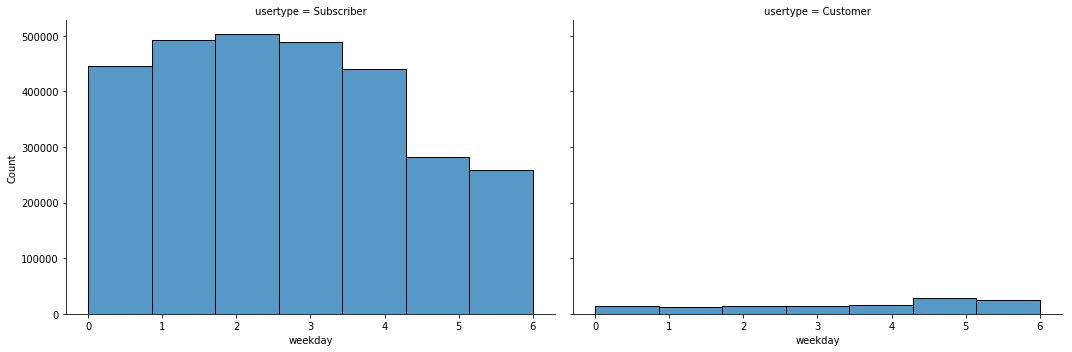

In [72]:
# Plot histogram for weekdays
sns.displot(data = trips_2018, x = 'weekday', bins = 7, col = 'usertype', aspect = 1.5)
plt.show()

<b> Observations </b>
- Frequency of the subscriber type rides starts decreasing when reach weekends while the frquency of customer type rides increases on weekends.  

### 4.7) Monthwise Analysis

In [82]:
# get the months
trips_2018['Ride_Month'] = trips_2018['start_time'].dt.month

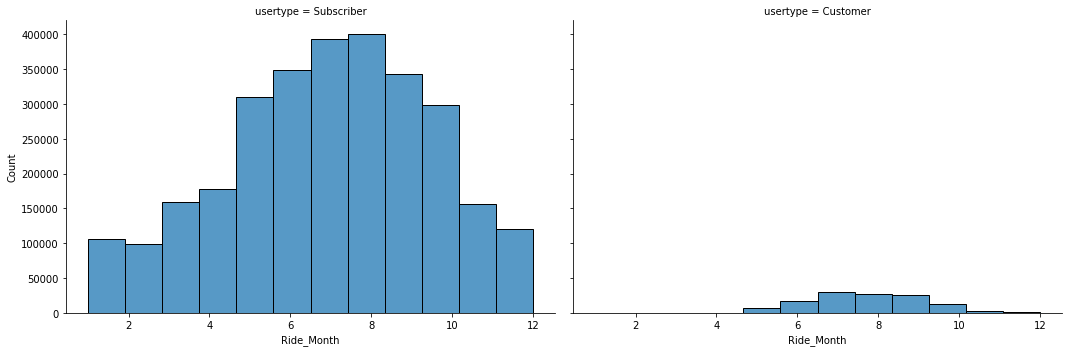

In [83]:
# Plot histogram for months
sns.displot(data = trips_2018, x = 'Ride_Month', bins = 12, col = 'usertype', aspect = 1.5)
plt.show()

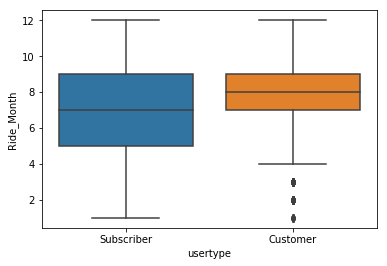

In [85]:
# PLot Boxplot for Month wise analysis
sns.boxplot(x = trips_2018['usertype'], y = trips_2018['Ride_Month'])
plt.show()

<b> Observations: </b>
- Highest number of customer type rides are happening in the 6th, 7th, 8th, 9th and 10th Months.
- Winter months see lesser number of rides from both types of riders.

### 4.8) Analyze Locations

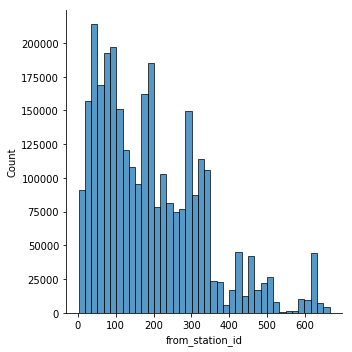

In [73]:
# histogram for from_station_id
sns.displot(data = trips_2018, x = 'from_station_id', bins = 40)
plt.show()

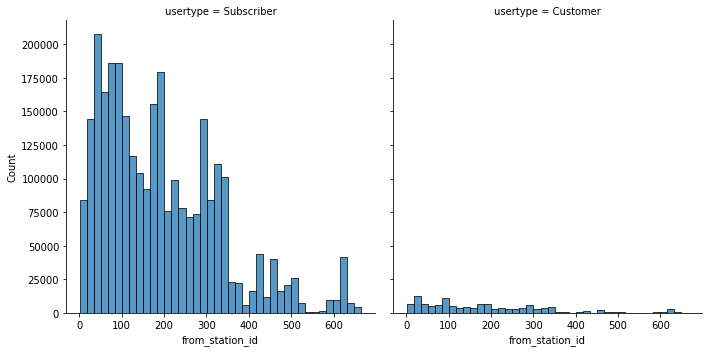

In [74]:
# histogram for from_station_id
sns.displot(data = trips_2018, x = 'from_station_id', col = 'usertype', bins = 40)
plt.show()

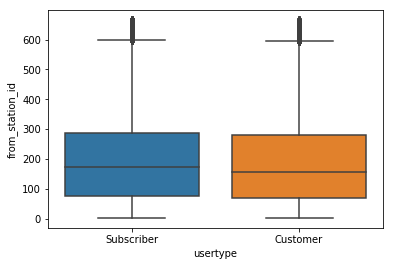

In [75]:
# Boxplot for from_station_id
sns.boxplot(x = trips_2018['usertype'], y = trips_2018['from_station_id'])
plt.show()

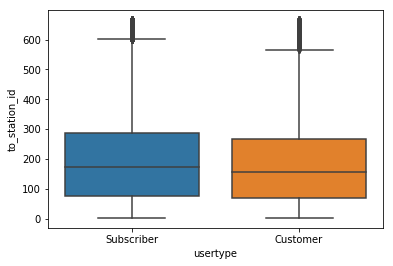

In [76]:
# Boxplot for to_station_id
sns.boxplot(x = trips_2018['usertype'], y = trips_2018['to_station_id'])
plt.show()

<b>Observation:</b>
- There is an overall lack of customers from station_id 300 to station_id 600. On these stations Cyclistic should focus on both types of customers.
-  There is no apparant difference between customers on the basis of station_id.

## 6.) Analysis Summary

<b> Quantity: </b> 
- Approx 96% rides are by Subscription type users 
- Approx 4% rides are by Customer type users 
- We don't have the count of users. We don't know the number of subscription type riders are there. We only know the number of rides.

<b> Trip Duration: </b>  
- Subscibers type riders generally use the bike for shorter durations while customer type riders use bike for longer duration.
- Average trip duration of customer type rides is 2206 seconds which is almost three times that of subscriber type tripduration.
- There is decent overlap in the customer trip duration and subscriber trip duration, meaning there are enough number of customers who have same tripduration as subscribers.

<b> Age: </b>
- Comparatively the younger users are less subscription types. 
- However the age is not a defining factor for choice between Subscriber type and Customer type

<b> Gender: </b>
- Percentage of Subscriber type rides by males is Higher compared to  Females
- Customer type females rides have higher percentage compared to customer type male rides, but the total number of Males customer type rides is higher  

<b> Start Time: </b>
- Subscribers type riders are using bikes comparatively more in the morning compared to the Customer type rides.
- 25th percentile for Subscribers is near 9 AM and for Customer type riders it is near 11 AM.

<b> End Time: </b>
- There is decent difference in the end time percentiles for Subscribers type rides and Customer type rides.
- Customer type rides are ending later in the day (12PM, 15 PM and 18 PM are percentiles) compared to Subscriber type rides.

<b> WeekDay and Month </b>
- Frequency of the subscriber type rides starts decreasing on weekends while the frquency of customer type rides increases on weekends.
- Majority of the customer type rides are happening in the 6th, 7th, 8th, 9th and 10th Months.
- Winter months see lesser number of rides from both types of riders.

<b> Station ID:</b>
- There is an overall lack of rides on station ranging from station_id 300 to station_id 600. On these stations Cyclistic should focus on both types of customers.
-  There is no apparant difference between customers on the basis of station_id.